https://www.youtube.com/watch?v=aTRYhWYqMzA

In [1]:
# Import of required libraries and packages
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
import pandas as pd

print(ig.__version__)

0.9.10


In [2]:
scim = ig.read('hb_sim.net',format="pajek")

3.	Check if the network is undirected/directed and weighted/unweighted

In [3]:
scim.summary()

'IGRAPH UNW- 5144 472520 -- \n+ attr: id (v), name (v), weight (e)'

In [4]:
scim.vcount(), scim.ecount()

(5144, 472520)

4.	Calculate degree and plot degree distribution

In [6]:
scim_degree = pd.DataFrame({'degree': scim.degree()})

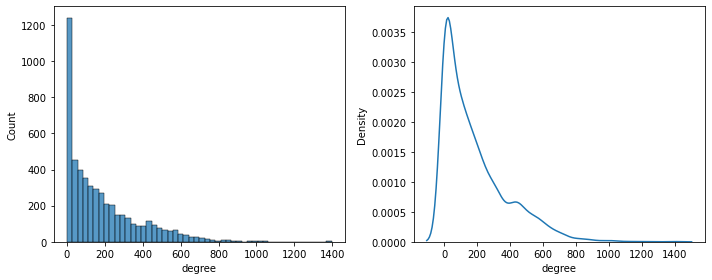

In [7]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=scim_degree, x='degree', ax=ax[0])
sns.kdeplot(data=scim_degree, x='degree', ax=ax[1])
plt.tight_layout();

Check if the network is connected

In [9]:
cc = scim.clusters(mode='weak')
print('# connected component', len(cc))

# connected component 542


6.	Identify the largest connected component

In [10]:
cc = np.array(sorted(cc, key=len, reverse=True), dtype='object')

In [11]:
for i in range(5):
    print(len(cc[i]))

4599
2
2
2
2


7.	Retain only this largest component

In [12]:
scim_comp = scim.subgraph(cc[0])

8.	Calculate degree and plot degree distribution again

In [13]:
scim_comp_degree = pd.DataFrame({'degree': scim_comp.degree()})

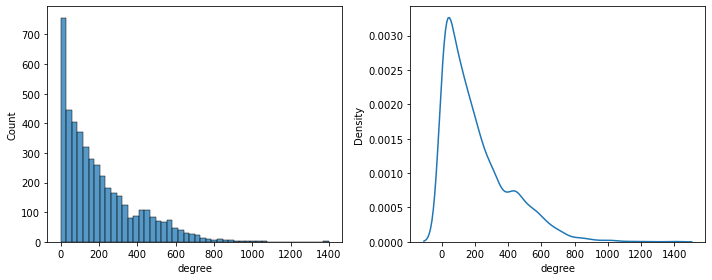

In [14]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=scim_comp_degree, x='degree', ax=ax[0])
sns.kdeplot(data=scim_comp_degree, x='degree', ax=ax[1])
plt.tight_layout();

9.	Save new network in pajek format

In [15]:
scim_comp.summary()

'IGRAPH UNW- 4599 472516 -- \n+ attr: id (v), name (v), weight (e)'

In [16]:
scim_comp.vs.attributes()

['id', 'name']

In [17]:
uts = scim_comp.vs.get_attribute_values("name")
colnames=['UT', 'Title', 'Journal', 'PubYear','Volume','Issue','DocType','TimesCited'] 
pubs = pd.read_csv("Publications_Wos.txt",delimiter='\t', index_col=False,
                   names=colnames, header=None).set_index('UT')

C:\Users\milto\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [18]:
pubs

,Title,Journal,PubYear,Volume,Issue,DocType,TimesCited
UT,,,,,,,
000071723600001,"Comments on Belver C. Griffith, recipient of t...",SCIENTOMETRICS,1997,40,3,359,Biographical-Item
000071723600002,"Comments on John Irvine and Ben R. Martin, rec...",SCIENTOMETRICS,1997,40,3,363,Editorial Material
000071723600003,From the opening address of the conference,SCIENTOMETRICS,1997,40,3,367,Editorial Material
000071723600004,Ambiguity in measurement,SCIENTOMETRICS,1997,40,3,369,Article; Proceedings Paper
000071723600005,Cross-national comparison of Frontier areas of...,SCIENTOMETRICS,1997,40,3,385,Article; Proceedings Paper
...,...,...,...,...,...,...,...
A1997YH07800003,View from afar: 'visible' productivity of scie...,SCIENTOMETRICS,1997,40,2,215,Article
A1997YH07800004,Mapping the social and behavioral sciences wor...,SCIENTOMETRICS,1997,40,2,237,Article
A1997YH07800005,International publication patterns in social s...,SCIENTOMETRICS,1997,40,2,277,Article


## Clustering and visualization

In [23]:
layout_fr = scim_comp.layout('fr')

1.	Run three community detection algorithms from the igraph packages 
(eg cluster_leading_eigen; cluster_multilevel; cluster_leiden)

cluster_leading_eigen

In [24]:
lead = scim_comp.community_leading_eigenvector()

In [25]:
lead.modularity

0.35572893180587095

In [26]:
lead.summary()

'Clustering with 4599 elements and 5 clusters'

In [27]:
k = len(lead)
lead.sizes()

[992, 506, 1670, 1120, 311]

In [28]:
sum(lead.sizes())

4599

In [17]:
scim_comp.summary()

'IGRAPH UNW- 4599 472516 -- \n+ attr: id (v), name (v), weight (e)'

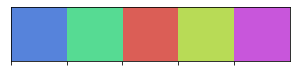

In [29]:
colors = np.random.permutation(sns.color_palette('hls', k)).tolist()
sns.palplot(colors)

In [30]:
scim_comp.vs['color'] = ['None']

In [31]:
for clid, cluster in enumerate(lead):
    for i in cluster:
        scim_comp.vs[i]['color'] = colors[clid]

In [32]:
visual_style = {
    #Define style from network plotting
    "vertex_size": 5,
    "vertex_label": None,
    "vertex_color": scim_comp.vs['color'],
    "layout": layout_fr,
    "edge_width": 1
}

fig = ig.plot(scim_comp, **visual_style)

In [22]:
fig.save('aa.png')

cluster_multilevel

In [33]:
lvn = scim_comp.community_multilevel()

In [34]:
lvn.modularity

0.3983253404345067

In [35]:
k = len(lvn)
lvn.sizes()

[507, 1591, 682, 825, 475, 519]

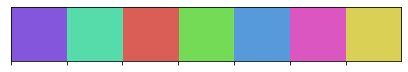

In [34]:
colors = np.random.permutation(sns.color_palette('hls', k)).tolist()
sns.palplot(colors)

In [36]:
scim_comp.vs['color'] = [None]
for clid, cluster in enumerate(lvn):
    for i in cluster:
        scim_comp.vs[i]['color'] = colors[clid]

In [37]:
fig = ig.plot(scim_comp, **visual_style)
fig.save('zz.png')

cluster walktrap

In [37]:
walktrap = scim_comp.community_walktrap()

In [38]:
walktrap_cl = walktrap.as_clustering()

In [40]:
walktrap_cl.modularity

0.35466842394394277

In [41]:
k = len(walktrap_cl)
k

158

4.	Compare the obtained cluster solutions using Normalized Mutual Information

In [39]:
ig.compare_communities(lead, walktrap_cl, method='nmi')

0.3760509033996571

In [40]:
ig.compare_communities(lead, lvn, method='nmi')

0.4247318537855573

In [45]:
ig.compare_communities(lvn, walktrap_cl, method='nmi')

0.5864141244527912

In [46]:
ig.compare_communities(lead, lvn, method='adjusted_rand')

0.2607553730858692

### Extracting most central nodes

In [47]:
communities = lvn.subgraphs()

In [48]:
communities[0].summary()

'IGRAPH UNW- 507 21197 -- \n+ attr: color (v), id (v), name (v), weight (e)'

In [50]:
# communities[0].strength()

In [51]:
def getCentralPublications(subgraph):
    wdeg = subgraph.strength()
    betw = subgraph.betweenness()
    
    centralPubs = subgraph.vs[np.where(
        (wdeg>=np.percentile(wdeg, 95)) & 
        (betw>=np.percentile(betw, 95))
    )[0].tolist()]['name']
    
    for i in pubs.loc[centralPubs]['Title']:
        print(f'Title = {i}')

In [52]:
getCentralPublications(communities[1])

Title = Comparative investigation of frequency and strength of motives toward referencing, the reference threshold model - Comments on theories of citation?
Title = Chemistry research in Eastern Central Europe (1992-1997) - Facts and figures on publication output and citation impact
Title = Journal impact measures in bibliometric research
Title = An overview of cross-national, national, and institutional assessment as reflected in the international journal Scientometrics
Title = The visibility of Italian journals
Title = A comparative study of research performance in computer science
Title = Fatal attraction: Conceptual and methodological problems in the ranking of universities by bibliometric methods
Title = Competition for funding as an indicator of research competitiveness
Title = Comparison and evaluation of domestic and international outputs in Information Science & Technology research of China
Title = Bibliometric monitoring of research performance in the social sciences and the 

## Degeneracy in clustering

In [53]:
mod_list_lvn =[]
comm_list_lvn = []
memb_list_lvn = []
perm_list=[]

comm_list_lvn.append(lvn)
memb_list_lvn.append(lvn.membership)
mod_list_lvn.append(lvn.modularity)

nodes = scim_comp.vcount()

for i in range(1, 6):
    perm = np.random.permutation(nodes).tolist()
    perm_scim = scim_comp.permute_vertices(perm)
    com = perm_scim.community_multilevel(weights=perm_scim.es['weight'])
    
    a = pd.DataFrame(
        {'ID': perm_scim.vs()['id'],
         'cluster': com.membership}
    ).sort_values('ID')
    
    memb_list_lvn.append(a.loc[:, 'cluster'].values)
    mod_list_lvn.append(com.modularity)
    comm_list_lvn.append(com)
    perm_list.append(perm)

In [54]:
mod_list_lvn

[0.3983253404345067,
 0.4781630513439519,
 0.47763967073682095,
 0.4758331415953307,
 0.478034475909865,
 0.47765208871807235]

In [110]:
for i in range(0, 5):
    for j in range(i+1, 6):
        rand = ig.compare_communities(memb_list_lvn[i], memb_list_lvn[j], 'rand')
        nmi = ig.compare_communities(memb_list_lvn[i], memb_list_lvn[j], 'nmi')
        print(f'Comparing permutations {i} and {j}, nmi={nmi}, rand={rand}')

Comparing permutations 0 and 1, nmi=0.6611732481282399, rand=0.85362789970511
Comparing permutations 0 and 2, nmi=0.6732179437639237, rand=0.8582792314194293
Comparing permutations 0 and 3, nmi=0.7162538570300677, rand=0.8823437892062129
Comparing permutations 0 and 4, nmi=0.6864930197021911, rand=0.8683378698453745
Comparing permutations 0 and 5, nmi=0.6661236406139166, rand=0.8509682258781033
Comparing permutations 1 and 2, nmi=0.8718903955244749, rand=0.9706149596036203
Comparing permutations 1 and 3, nmi=0.7888165722708455, rand=0.925561857396425
Comparing permutations 1 and 4, nmi=0.8218120082436009, rand=0.951719367856223
Comparing permutations 1 and 5, nmi=0.8251808248036315, rand=0.9553796941881099
Comparing permutations 2 and 3, nmi=0.8015900018046764, rand=0.9261513722416914
Comparing permutations 2 and 4, nmi=0.8796289480152687, rand=0.9668506902563401
Comparing permutations 2 and 5, nmi=0.8606946875180872, rand=0.9627630531477946
Comparing permutations 3 and 4, nmi=0.776332

In [111]:
m = pd.DataFrame(
    {'Unweighted':memb_list_lvn[0], 
     'p1':memb_list_lvn[1],
     'p2':memb_list_lvn[2],
     'p3':memb_list_lvn[3],
     'p4':memb_list_lvn[4],
     'p5':memb_list_lvn[5]}
)

In [112]:
table = pd.crosstab(m['Unweighted'], m['p2'])

In [113]:
table

p2,0,1,2,3,4,5,6,7,8,9,10,11,12
Unweighted,,,,,,,,,,,,,
0,345,1,1,1,1,0,1,4,0,0,3,0,0
1,296,243,1003,22,12,3,137,82,9,0,0,3,2
2,13,10,31,618,12,1,5,7,0,0,0,0,0
3,12,10,22,4,19,1,2,684,0,0,0,0,0
4,3,0,8,2,0,452,0,2,0,0,0,0,0
5,2,2,10,4,479,0,5,7,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,3,0,0,0
